### Analyzing the Stroop Effect
Perform the analysis in the space below. Remember to follow [the instructions](https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True) and review the [project rubric](https://review.udacity.com/#!/rubrics/71/view) before submitting. Once you've completed the analysis and write-up, download this file as a PDF or HTML file, upload that PDF/HTML into the workspace here (click on the orange Jupyter icon in the upper left then Upload), then use the Submit Project button at the bottom of this page. This will create a zip file containing both this .ipynb doc and the PDF/HTML doc that will be submitted for your project.


(1) What is the independent variable? What is the dependent variable?

The independent variable is whether the list is of congruent or incongruent words.

The dependent variable is the time it takes to name the ink colours in equally-sized lists.

(2) What is an appropriate set of hypotheses for this task? Specify your null and alternative hypotheses, and clearly define any notation used. Justify your choices.

My Null Hypotheses is that the mean time to name the ink colours for both congruent and incongruent words are the same
My Alternative Hypotheses is that the mean time to name the ink colours is NOT the same

H_0 μc - μi = 0

H_1 μc - μi != 0

where 

μc is the population mean for Congruent list of words

μi is the population mean for Incongruent list of words

My Null Hypotheses is true before testing, and states two groups are equal
My Alternative Hypotheses is what we would like to prove to be true

With our test we are trying to assess whether the sample means are different because the two population means are different or just by chance.

(3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.

In [8]:
# Perform the analysis here

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

df = pd.read_csv('stroopdata.csv')
df.head()

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
Congruent      24 non-null float64
Incongruent    24 non-null float64
dtypes: float64(2)
memory usage: 464.0 bytes


In [24]:
df.Congruent.mean()

14.051124999999999

In [25]:
df.Incongruent.mean()

22.015916666666666

In [26]:
df.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


For the Congruent sample:
The mean time was 14.051125 seconds
The standard deviation was 3.559358 seconds

Tor the Incongruent sample 
The mean time was 22.015917 seconds
The standard deviation was 4.797057 seconds

(4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

In [28]:
# Build the visualizations here

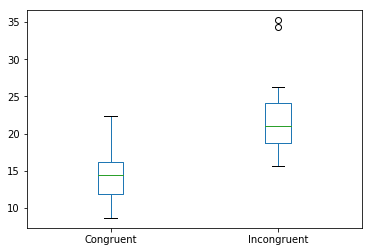

In [30]:
df.plot.box()

Boxplot clearly shows the mean time for the Incongruent sample is greater than mean of Congruent sample

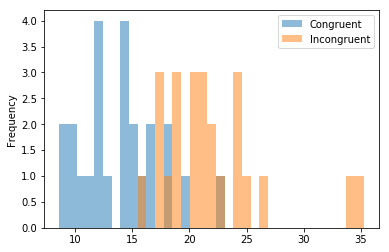

In [45]:
df.plot.hist(alpha= 0.5, bins=35)

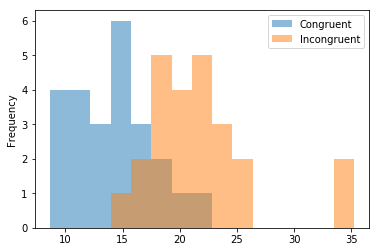

In [49]:
df.plot.hist(alpha= 0.5, bins=15)

Histogram also confirms that Incongruent sample times frequently took longer than Congruent sample.

(5)  Now, perform the statistical test and report your results. What is your confidence level or Type I error associated with your test? What is your conclusion regarding the hypotheses you set up? Did the results match up with your expectations? **Hint:**  Think about what is being measured on each individual, and what statistic best captures how an individual reacts in each environment.

In [60]:
# Perform the statistical test here

# Bootstrapping solution

# With our test we are trying to assess whether the sample means are different because the two population means are different or just by chance.

df_con = df.Congruent
df_incon = df.Incongruent

congruent_means, incongruent_means, diffs = [], [], []

for _ in range(10000):
    bootsamp_con = df_con.sample(200, replace = True)
    bootsamp_incon = df_incon.sample(200, replace = True)
    congruent_mean = bootsamp_con.mean()
    incongruent_mean = bootsamp_incon.mean()
    # append the info
    congruent_means.append(congruent_mean)
    incongruent_means.append(incongruent_mean)
    diffs.append(congruent_mean - incongruent_mean)

In [62]:
np.std(congruent_means)
np.std(incongruent_means) 
np.std(diffs) 
# the standard deviation for the sampling distribution for difference in means

0.41178072885326167

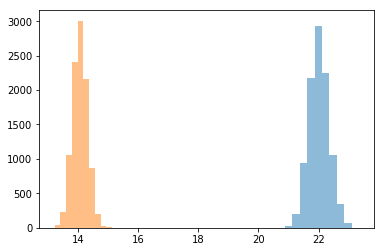

In [63]:
plt.hist(incongruent_means, alpha = 0.5);
plt.hist(congruent_means, alpha = 0.5); # They look pretty normal to me!

In [66]:
null_vals = np.random.normal(0, np.std(diffs), 10000)

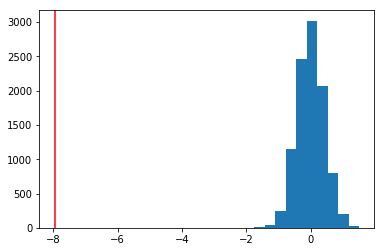

In [75]:
plt.hist(null_vals) #Here is the sampling distribution of the difference under the null
plt.axvline(x = np.mean(diffs), color = 'red')

In [76]:
pval = (null_vals < np.mean(diffs)).mean()
pval

0.0

With our test we are trying to assess whether the sample means are different because the two population means are different or just by chance.

We reject the null hypotheses because the p-value is 0. 

The confidence level is 95% / Type I error rate of 0.05 because this test is associated with this two-sided test.

Yes, The results match up with your expectations, and personal experience with the Stroop test.

(6) Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!

Congruent words could be sensed by colour or reading. However Incongruent words require the brain to reconsile the difference, which may require additional time to answer.

Another task perhaps could be counting the number of words where the words are different numbers.

"...reading is much more practiced than color naming and therefore reading dominates naming without regard for attention, causing interference." A Protopapas

http://web.uvic.ca/~dbub/Cognition_Action/Essaytopicscontrol_files/Readingability.pdf